In [1]:
push!(LOAD_PATH, ".")
using FFTWtoolkit, FFTW
using LinearAlgebra
# using HDF5, DelimitedFiles
using PyPlot

┌ Info: Recompiling stale cache file /home/karel/.julia/compiled/v1.0/FFTWtoolkit.ji for FFTWtoolkit [top-level]
└ @ Base loading.jl:1190
┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1192


In [2]:
using PyCall
pyabf=pyimport("pyabf")


PyObject <module 'pyabf' from '/home/karel/.local/lib64/python3.6/site-packages/pyabf/__init__.py'>

In [46]:
arxnombre="../ABFiles/Eduardo/CarbacholCA3.abf" 
arx=pyabf.ABF(arxnombre)
palabra=arxnombre[1:end-4]

"../ABFiles/Eduardo/CarbacholCA3"

In [8]:
print("tenemos ", arx.channelCount, " Canales")

tenemos 1 Canales

In [9]:
print("Tenemos ", arx.sweepCount,  " barridas")

Tenemos 23 barridas

In [108]:
nsweep=3
arx.setSweep(nsweep)

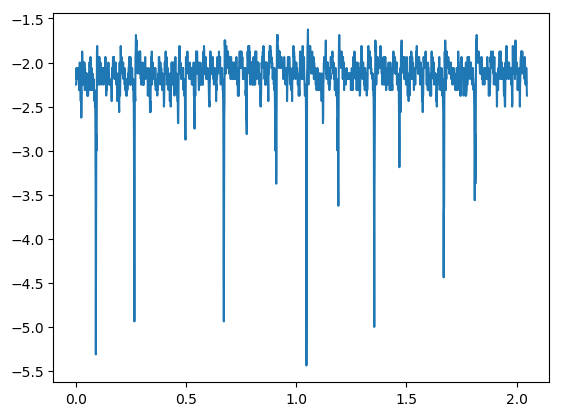

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f2d9ba14dd8>

In [109]:
tts=arx.sweepX
vvs=arx.sweepY
plot(tts,vvs)

In [110]:
arx.sweepPointCount

2048

In [111]:
arx.sweepX ##Jaja, observa que hay un pequeño error de redondeno (esto son los tiempos!!)

2048-element Array{Float64,1}:
 0.0                 
 0.001               
 0.002               
 0.003               
 0.004               
 0.005               
 0.006               
 0.007               
 0.008               
 0.009000000000000001
 0.01                
 0.011               
 0.012               
 ⋮                   
 2.036               
 2.037               
 2.0380000000000003  
 2.039               
 2.04                
 2.041               
 2.0420000000000003  
 2.043               
 2.044               
 2.045               
 2.0460000000000003  
 2.047               

In [112]:
nmax=arx.sweepPointCount
freq=1/(arx.dataSecPerPoint) # Son Hz!

1000.0

In [113]:
rango=1:nmax
tmax=nmax/freq
rangotiempos=(rango.-1)./freq
rangofreqs=(rango.-1)./tmax
rfreqsim=map(x->-freq/2+(x-1)*freq/(nmax-1),rango);
rfreqsim[1025]

0.2442598925256334

In [114]:
rangofreqs[2]

0.48828125

In [115]:
plan=plan_fft(vvs,  flags=FFTW.PATIENT)
fttotal=(plan*vvs);
ftsym=circshift(fttotal, div(nmax,2));

In [116]:
epoder=map(abs, ftsym);

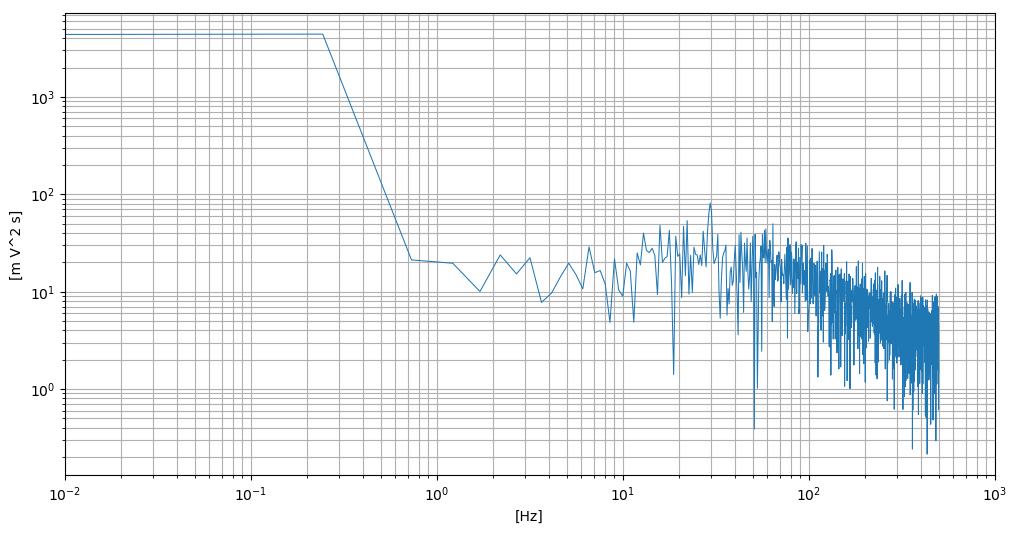

In [117]:
figura=figure(figsize=(12,6))
grid(which="both")
xlim(+0.01,999)
xlabel("[Hz]")
ylabel("[m V^2 s]")
yscale("log")
xscale("log")
#yscale("log")
mediorango=1:500
plot(rfreqsim,epoder, lw=0.74)
outname=palabra*"-sweep_$nsweep.png"
savefig(outname,dpi=90)